In [5]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [6]:
df = pd.read_excel('Maths/Leader_final.xlsx')
df.head()

,Unnamed: 0,#,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,#,Name,"Gupta, Aayush","Gowda, Adarsh","Nair, Adarsh","Pandey, Aditya","Bhatia, Anav","Narayan, Anchit","Singh, Asheesh Kumar","Mittal, Ayushi",...,"Agravanshi, Subandhu","Sonnathi, Sumanth","Paul, Suvrojyoti","Abdul Khader, Syed","Sahu, Tamanna","Kumar Singh, Tejasvi","Pani, Tirtha","Saini, Vanshu","Kumar, Vivek","R K, Vysakh"
1,1,"Gupta, Aayush",NaN,1,NaN,NaN,NaN,NaN,1,1,...,1,1,NaN,1,1,1,1,1,NaN,1
2,2,"Gowda, Adarsh",NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,NaN,1,1
3,3,"Nair, Adarsh",NaN,1,NaN,1,NaN,NaN,NaN,NaN,...,1,1,1,NaN,NaN,1,1,1,NaN,NaN
4,4,"Pandey, Aditya",NaN,NaN,1,NaN,NaN,1,1,NaN,...,1,1,1,NaN,1,1,1,NaN,NaN,NaN


In [7]:
df = df.fillna(0)
df.head()

,Unnamed: 0,#,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,#,Name,"Gupta, Aayush","Gowda, Adarsh","Nair, Adarsh","Pandey, Aditya","Bhatia, Anav","Narayan, Anchit","Singh, Asheesh Kumar","Mittal, Ayushi",...,"Agravanshi, Subandhu","Sonnathi, Sumanth","Paul, Suvrojyoti","Abdul Khader, Syed","Sahu, Tamanna","Kumar Singh, Tejasvi","Pani, Tirtha","Saini, Vanshu","Kumar, Vivek","R K, Vysakh"
1,1,"Gupta, Aayush",0,1,0,0,0,0,1,1,...,1,1,0,1,1,1,1,1,0,1
2,2,"Gowda, Adarsh",0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,1
3,3,"Nair, Adarsh",0,1,0,1,0,0,0,0,...,1,1,1,0,0,1,1,1,0,0
4,4,"Pandey, Aditya",0,0,1,0,0,1,1,0,...,1,1,1,0,1,1,1,0,0,0


In [8]:
df = df[df.columns[2:44]][1:]
for col in df.columns:
    df[col] = df[col].apply(lambda x:1 if x==1 else 0)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
1,0,1,0,0,0,0,1,1,1,1,...,1,1,0,1,1,1,1,1,0,1
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,1,1
3,0,1,0,1,0,0,0,0,0,0,...,1,1,1,0,0,1,1,1,0,0
4,0,0,1,0,0,1,1,0,0,0,...,1,1,1,0,1,1,1,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,1,0


In [9]:

adj_mat = df.to_numpy(np.int64)
adj_mat

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 0]], dtype=int64)

In [10]:
adj_mat.shape

(42, 42)

In [11]:
input_data = pd.DataFrame(adj_mat.T)
G = nx.DiGraph(adj_mat.T)

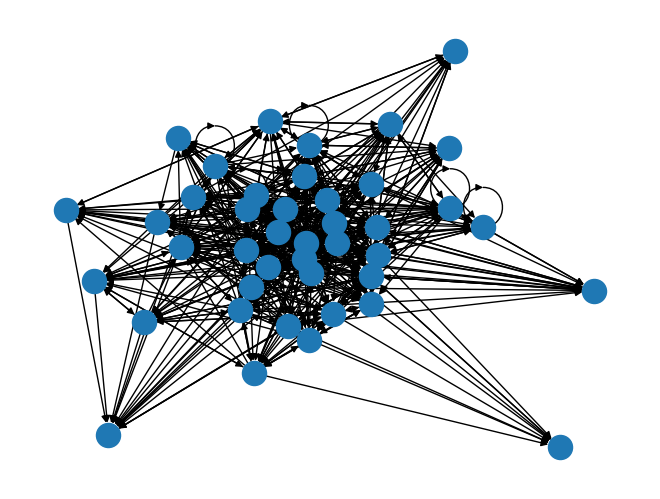

In [12]:
nx.draw(G)

In [13]:
import random
node_count = {i:0 for i in range(42)}
choice = random.choice(range(42))
node_count[choice]+=1
for i in range(10000):
    choice = random.choice(list(G.out_edges(choice)))[1]
    node_count[choice]+=1
node_count

1074